In [1]:
%matplotlib inline
from setup import *
import glob
from sklearn.mixture import GaussianMixture
from pandas.tools.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn import preprocessing
from random import randint

In [2]:
ls = glob.glob('*.csv')
df_tmp = pd.read_csv('_LeagueofLegends.csv')
df_temp = df_tmp[['blueTopChamp','blueJungleChamp','blueMiddleChamp','blueADCChamp',
            'blueSupportChamp','redTopChamp','redJungleChamp','redMiddleChamp','redADCChamp',
            'redSupportChamp']]
list_champions = df_temp.stack().unique()
len(list_champions)
df_tmp['Game'] = df_tmp['MatchHistory'].str.replace(r'http://.*/.*/*/#match-details/.*/','')
df_tmp['Game'] = df_tmp['Game'].str.replace(r'\?.*','')
df_tmp['Game'] = df_tmp['Game'].astype(int)

In [3]:
df = pd.read_csv('_LeagueofLegends.csv')
df['Game'] = df['MatchHistory'].str.replace(r'http://.*/.*/*/#match-details/.*/','')
df['Game'] = df['Game'].str.replace(r'\?.*','')
df['Game'] = df['Game'].astype(int)
df = df.drop_duplicates('Game',keep='first')
blue_df = df[['blueTopChamp','blueJungleChamp','blueMiddleChamp','blueADCChamp','blueSupportChamp']]
blue_df.columns = ['Top','Jungle','Mid','ADC','Support']
red_df = df[['redTopChamp','redJungleChamp','redMiddleChamp','redADCChamp','redSupportChamp']]
red_df.columns = ['Top','Jungle','Mid','ADC','Support']
red_blue_df = pd.concat([red_df,blue_df],axis=0).reset_index(drop=True)
red_blue_df = red_blue_df.apply(lambda g: g.str.lower())

top_count = red_blue_df.groupby('Top').apply(lambda g: g.count())['Top'].to_frame()
jun_count = red_blue_df.groupby('Jungle').apply(lambda g: g.count())['Jungle'].to_frame()
mid_count = red_blue_df.groupby('Mid').apply(lambda g: g.count())['Mid'].to_frame()
adc_count = red_blue_df.groupby('ADC').apply(lambda g: g.count())['ADC'].to_frame()
sup_count = red_blue_df.groupby('Support').apply(lambda g: g.count())['Support'].to_frame()
top_count.index.names=['Champion']
jun_count.index.names=['Champion']
mid_count.index.names=['Champion']
adc_count.index.names=['Champion']
sup_count.index.names=['Champion']
counts = pd.merge(top_count,jun_count,left_index=True,right_index=True,how='outer')
counts = pd.merge(counts,mid_count,left_index=True,right_index=True,how='outer')
counts = pd.merge(counts,adc_count,left_index=True,right_index=True,how='outer')
counts = pd.merge(counts,sup_count,left_index=True,right_index=True,how='outer')
counts.fillna(0).astype('int').to_html('hero_counts.html')

In [4]:
df_assists = pd.read_csv(ls[0])
df_assists.Game = df_assists['Game'].astype(int)
df_assists = df_assists.sort_values('Game')
df_assists = df_assists.drop_duplicates('Game',keep='first')
merged = pd.merge(df_tmp, df_assists, on='Game',how='right')
merged = merged[['Game','blueTopChamp','blueJungleChamp','blueMiddleChamp','blueADCChamp',
            'blueSupportChamp','redTopChamp','redJungleChamp','redMiddleChamp','redADCChamp',
            'redSupportChamp','Champion_1','Champion_2','Champion_3','Champion_4',
                'Champion_5','Champion_6','Champion_7','Champion_8','Champion_9',
                'Champion_10']].sort_values('Game').reset_index()
merged.drop('index',axis=1,inplace=True)
merged = merged.drop_duplicates('Game',keep='first')
merged_champs = merged[['blueTopChamp','blueJungleChamp','blueMiddleChamp','blueADCChamp',
            'blueSupportChamp','redTopChamp','redJungleChamp','redMiddleChamp','redADCChamp',
            'redSupportChamp']]
merged_champs = merged_champs.apply(lambda x: x.astype(str).str.lower())
df_merged = pd.DataFrame(merged_champs.stack())
df_assists.drop('Game',axis=1,inplace=True)
df_assists_stacked = df_assists.stack()

In [5]:
df_dmg_healed = pd.read_csv(ls[2])
df_dmg_healed = df_dmg_healed.sort_values('Game')
df_dmg_healed = df_dmg_healed.drop_duplicates('Game',keep='first')
df_dmg_healed.drop('Game',axis=1,inplace=True)
df_dmg_healed_stacked = df_dmg_healed.stack()
df_dmg_taken = pd.read_csv(ls[3])
df_dmg_taken = df_dmg_taken.sort_values('Game')
df_dmg_taken = df_dmg_taken.drop_duplicates('Game',keep='first')
df_dmg_taken.drop('Game',axis=1,inplace=True)
df_dmg_taken_stacked = df_dmg_taken.stack()
df_kills = pd.read_csv(ls[8])
df_kills = df_kills.sort_values('Game')
df_kills = df_kills.drop_duplicates('Game',keep='first')
df_kills.drop('Game',axis=1,inplace=True)
df_kills_stacked = df_kills.stack()
df_magic_dmg_overall = pd.read_csv(ls[12])
df_magic_dmg_overall = df_magic_dmg_overall.sort_values('Game')
df_magic_dmg_overall = df_magic_dmg_overall.drop_duplicates('Game',keep='first')
df_magic_dmg_overall.drop('Game',axis=1,inplace=True)
df_magic_dmg_overall_stacked = df_magic_dmg_overall.stack()
df_magic_dmg_champs = pd.read_csv(ls[14])
df_magic_dmg_champs = df_magic_dmg_champs.sort_values('Game')
df_magic_dmg_champs = df_magic_dmg_champs.drop_duplicates('Game',keep='first')
df_magic_dmg_champs.drop('Game',axis=1,inplace=True)
df_magic_dmg_champs_stacked = df_magic_dmg_champs.stack()
df_minions_killed = pd.read_csv(ls[15])
df_minions_killed = df_minions_killed.sort_values('Game')
df_minions_killed = df_minions_killed.drop_duplicates('Game',keep='first')
df_minions_killed.drop('Game',axis=1,inplace=True)
df_minions_killed_stacked = df_minions_killed.stack()
df_neutral_minions = pd.read_csv(ls[16])
df_neutral_minions = df_neutral_minions.sort_values('Game')
df_neutral_minions = df_neutral_minions.drop_duplicates('Game',keep='first')
df_neutral_minions.drop('Game',axis=1,inplace=True)
df_neutral_minions_stacked = df_neutral_minions.stack()
df_phys_dmg_overall = pd.read_csv(ls[19])
df_phys_dmg_overall = df_phys_dmg_overall.sort_values('Game')
df_phys_dmg_overall = df_phys_dmg_overall.drop_duplicates('Game',keep='first')
df_phys_dmg_overall.drop('Game',axis=1,inplace=True)
df_phys_dmg_overall_stacked = df_phys_dmg_overall.stack()
df_phys_dmg_champs = pd.read_csv(ls[21])
df_phys_dmg_champs = df_phys_dmg_champs.sort_values('Game')
df_phys_dmg_champs = df_phys_dmg_champs.drop_duplicates('Game',keep='first')
df_phys_dmg_champs.drop('Game',axis=1,inplace=True)
df_phys_dmg_champs_stacked = df_phys_dmg_champs.stack()
df_tot_dmg_overall = pd.read_csv(ls[23])
df_tot_dmg_overall = df_tot_dmg_overall.sort_values('Game')
df_tot_dmg_overall = df_tot_dmg_overall.drop_duplicates('Game',keep='first')
df_tot_dmg_overall.drop('Game',axis=1,inplace=True)
df_tot_dmg_overall_stacked = df_tot_dmg_overall.stack()
df_tot_dmg_champs = pd.read_csv(ls[24])
df_tot_dmg_champs = df_tot_dmg_champs.sort_values('Game')
df_tot_dmg_champs = df_tot_dmg_champs.drop_duplicates('Game',keep='first')
df_tot_dmg_champs.drop('Game',axis=1,inplace=True)
df_tot_dmg_champs_stacked = df_tot_dmg_champs.stack()
df_wards_placed = pd.read_csv(ls[31])
df_wards_placed = df_wards_placed.sort_values('Game')
df_wards_placed = df_wards_placed.drop_duplicates('Game',keep='first')
df_wards_placed.drop('Game',axis=1,inplace=True)
df_wards_placed_stacked = df_wards_placed.stack()

In [6]:
df_full = pd.DataFrame({'Assists':df_assists_stacked,'Damage_Healed':df_dmg_healed_stacked,
                       'Damage_Taken':df_dmg_taken_stacked,'Kills':df_kills_stacked,
                       'Magic_Dmg_Overall':df_magic_dmg_overall_stacked,'Magic_Dmg_Champs':df_magic_dmg_champs_stacked,
                       'Minions_Killed':df_minions_killed_stacked,'Neutral_Minions':df_neutral_minions_stacked,
                       'Phys_Dmg_Overall':df_phys_dmg_overall_stacked,'Phys_Dmg_Champs':df_phys_dmg_champs_stacked,
                       'Total_Damage':df_tot_dmg_overall_stacked,'Total_Damage_Champs':df_tot_dmg_champs_stacked,
                       'Wards_Placed':df_wards_placed_stacked})
df_full.replace('-','0',inplace=True)
df_full.Damage_Healed = df_full.Damage_Healed.map(lambda x: x.rstrip('kmil '))
df_full.Damage_Taken = df_full.Damage_Taken.map(lambda x: x.rstrip('kmil '))
df_full.Magic_Dmg_Champs = df_full.Magic_Dmg_Champs.map(lambda x: x.rstrip('kmil '))
df_full.Magic_Dmg_Overall = df_full.Magic_Dmg_Overall.map(lambda x: x.rstrip('kmil '))
df_full.Phys_Dmg_Champs = df_full.Phys_Dmg_Champs.map(lambda x: x.rstrip('kmil '))
df_full.Phys_Dmg_Overall = df_full.Phys_Dmg_Overall.map(lambda x: x.rstrip('kmil '))
df_full.Total_Damage = df_full.Total_Damage.map(lambda x: x.rstrip('kmil '))
df_full.Total_Damage_Champs = df_full.Total_Damage_Champs.map(lambda x: x.rstrip('kmil '))
df_full.Damage_Healed = df_full.Damage_Healed.astype(float)
df_full.Damage_Taken = df_full.Damage_Taken.astype(float)
df_full.Magic_Dmg_Champs = df_full.Magic_Dmg_Champs.astype(float)
df_full.Magic_Dmg_Overall = df_full.Magic_Dmg_Overall.astype(float)
df_full.Phys_Dmg_Champs = df_full.Phys_Dmg_Champs.astype(float)
df_full.Phys_Dmg_Overall = df_full.Phys_Dmg_Overall.astype(float)
df_full.Total_Damage = df_full.Total_Damage.astype(float)
df_full.Total_Damage_Champs = df_full.Total_Damage_Champs.astype(float)
df_full.Damage_Healed = df_full.Damage_Healed * 1000
df_full.Damage_Taken = df_full.Damage_Taken * 1000
df_full.Magic_Dmg_Champs = df_full.Magic_Dmg_Champs * 1000
df_full.Magic_Dmg_Overall = df_full.Magic_Dmg_Overall * 1000
df_full.Phys_Dmg_Champs = df_full.Phys_Dmg_Champs * 1000
df_full.Phys_Dmg_Overall = df_full.Phys_Dmg_Overall * 1000
df_full.Total_Damage = df_full.Total_Damage * 1000
df_full.Total_Damage_Champs = df_full.Total_Damage_Champs * 1000
df_full

Assists  Damage_Healed  Damage_Taken  Kills  \
1888 Champion_1         3       4900.000     36000.000      3   
     Champion_2         8       2400.000     29700.000      1   
     Champion_3         3        400.000     17000.000      5   
     Champion_4         6       1800.000     17500.000      0   
     Champion_5         5       3900.000     12900.000      2   
     Champion_6        16       2100.000     17800.000      2   
     Champion_7        11       7100.000     31800.000      7   
     Champion_8        12       1600.000      7600.000     10   
     Champion_9        17       2700.000     10100.000      5   
     Champion_10       16        200.000     10300.000      3   
1889 Champion_1         4        800.000     18600.000      5   
     Champion_2         4       1600.000     14900.000      1   
     Champion_3         2        800.000     11600.000      6   
     Champion_4         6        600.000      8200.000      2   
     Champion_5         6       1100.000      7700.000      0   
...                   ...            ...           ...    ...   
2604 Champion_6         2        400.000     12100.000      0   
     Champion_7         1       7600.000     22900.000      1   
     Champion_8         1       2400.000     12500.000      1   
     Champion_9         2       1700.000      9300.000      0   
     Champion_10        2       5900.000     17400.000      0   
2605 Champion_1        10       3400.000     21300.000      2   
     Champion_2        12       9000.000     32100.000      2   
     Champion_3         5      27800.000     28000.000      4   
     Champion_4         9       3900.000     17100.000      7   
     Champion_5        14       6600.000     29800.000      1   
     Champion_6         7       4300.000     18200.000      4   
     Champion_7         8      12100.000     37800.000      2   
     Champion_8        11      11500.000     28600.000      1   
     Champion_9         7       4700.000     16900.000      8   
     Champion_10       13       2400.000     16400.000      1   

                  Magic_Dmg_Champs  Magic_Dmg_Overall  Minions_Killed  \
1888 Champion_1           1500.000           4500.000             181   
     Champion_2           1500.000          16200.000              30   
     Champion_3          17300.000         156000.000             273   
     Champion_4           1600.000          18700.000             293   
     Champion_5           1900.000           6400.000              22   
     Champion_6          19600.000         133700.000             188   
     Champion_7           1600.000          25700.000              31   
     Champion_8          29800.000         172000.000             226   
     Champion_9            800.000           7600.000             224   
     Champion_10          5800.000          14400.000              24   
1889 Champion_1           4000.000          26400.000             245   
     Champion_2           3800.000          44200.000              26   
     Champion_3          13600.000          91200.000             205   
     Champion_4            500.000           1300.000             210   
     Champion_5           2300.000           9700.000              25   
...                            ...                ...             ...   
2604 Champion_6            500.000          22100.000             170   
     Champion_7            700.000           9100.000              17   
     Champion_8          10500.000          89600.000             214   
     Champion_9              0.000              0.000             284   
     Champion_10          1100.000           7400.000              28   
2605 Champion_1           4300.000          96700.000             226   
     Champion_2          20900.000         151100.000              67   
     Champion_3          22100.000         212200.000             334   
     Champion_4          15500.000          99100.000             325   
     Champion_5           4200.000     

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_full)
df_normalized = pd.DataFrame(np_scaled)
df_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.094,0.056,0.255,0.150,0.016,0.004,0.194,0.000,0.102,0.062,0.067,0.109,0.070
1,0.250,0.028,0.207,0.050,0.016,0.013,0.030,0.233,0.076,0.066,0.085,0.077,0.102
2,0.094,0.005,0.111,0.250,0.180,0.121,0.293,0.017,0.017,0.015,0.132,0.191,0.032
3,0.188,0.021,0.114,0.000,0.017,0.015,0.315,0.077,0.120,0.155,0.152,0.115,0.019
4,0.156,0.045,0.079,0.100,0.020,0.005,0.022,0.000,0.007,0.003,0.007,0.030,0.306
5,0.500,0.024,0.117,0.100,0.204,0.104,0.201,0.021,0.018,0.010,0.110,0.203,0.108
6,0.344,0.082,0.223,0.350,0.017,0.020,0.031,0.303,0.138,0.079,0.112,0.128,0.064
7,0.375,0.018,0.039,0.500,0.309,0.134,0.242,0.059,0.003,0.012,0.142,0.292,0.051
8,0.531,0.031,0.058,0.250,0.008,0.006,0.240,0.063,0.229,0.147,0.137,0.205,0.051
9,0.500,0.002,0.059,0.150,0.060,0.011,0.024,0.007,0.012,0.005,0.014,0.069,0.318


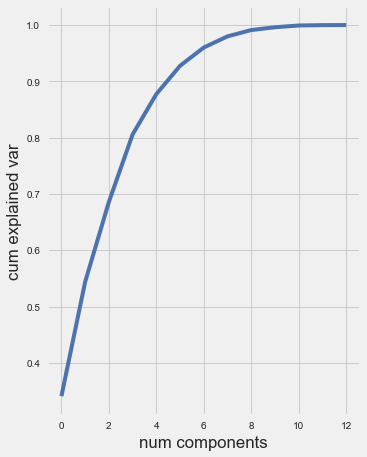

In [8]:
pca = PCA().fit(df_normalized)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('num components')
plt.ylabel('cum explained var');

In [9]:
pca = PCA(8)
projected_normalized = pca.fit_transform(df_normalized)
df_normalized_projected = pd.DataFrame(projected_normalized)
df_normalized_projected

,0,1,2,3,4,5,6,7
0,0.008,-0.090,-0.082,-0.046,-0.027,0.024,0.160,0.061
1,-0.170,0.123,-0.071,-0.052,-0.026,-0.115,0.005,0.048
2,0.171,-0.124,0.022,0.139,-0.137,0.006,0.033,0.024
3,0.093,-0.097,-0.100,-0.083,0.086,-0.158,-0.003,-0.002
4,-0.282,-0.115,0.015,-0.045,-0.069,0.105,0.004,-0.016
5,-0.002,-0.016,0.319,0.006,-0.008,-0.173,-0.044,0.067
6,-0.019,0.304,0.029,-0.119,-0.214,-0.063,0.077,0.022
7,0.247,0.051,0.331,0.094,-0.327,-0.004,-0.024,0.035
8,0.145,0.065,0.216,-0.296,-0.090,-0.170,-0.027,0.021
9,-0.273,-0.016,0.302,-0.153,-0.089,-0.025,-0.060,-0.034


In [10]:
gmm = GaussianMixture(n_components=12,random_state=42).fit(df_normalized_projected)
labels = gmm.predict(df_normalized_projected)

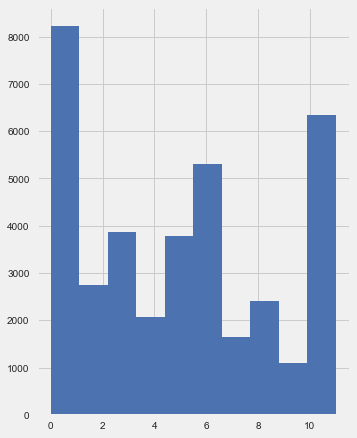

In [11]:
df_labels_normalized_gmm = pd.DataFrame(labels)
plt.hist(df_labels_normalized_gmm);

In [12]:
df_merged_new = df_merged.reset_index()
df_merged_new['Label'] = df_labels_normalized_gmm
df_merged_new.columns = ['Match_Number','Champion_Role','Champion','Label']
df_merged_final_count = df_merged_new.groupby(['Champion','Label']).count()
df_final = df_merged_final_count['Match_Number'].unstack().fillna(value=0)
df_final['Sum'] = df_final.sum(axis=1)
df_final_tmp = df_final['Sum']
df_final = df_final.apply(lambda g: (g/df_final['Sum'])*100)
df_final['Total_Count'] = df_final_tmp
df_final.to_html('frame.html')

In [13]:
# This cell is just for cleaning up the frame for the report
df_final_new = df_final
df_final_new.columns=['Glass_Cannon_Magic', 'Sustained_Magic_Dmg','Magic_Dmg_Jungle','Bruisers',
                     'Magic_Dmg_Support', 'Physical_Dmg_Jungle_Close', 'Tanky_Support', 'Magic_Dmg_Close',
                     'Hybrid_Dmg', 'Hybrid_Jungle', 'Iffy', 'ADC','Sum','Total_Count']
df_final_new.to_html('Final_Frame.html')